In [1]:
import numpy as np
import pandas as pd
import glob
import os
from decimal import *
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2

#import my script
import datain


In [2]:
#These will eventually be input variables 
P='P1' 
A=3
path=r'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz'
initfile=1
finfile=20
Ampa=np.r_[1:6]
Xrayraw=False
filestr=str(P + ' '+str('%.3f'%float(A))+ ' '+"*0*.txt")
filestr

'P1 3.000 *0*.txt'

In [3]:
%autoreload
import datain
data=[]
for n in Ampa:
    if n == 1:
        print(n)
        data=np.array(datain.getdata(P,n,path,initfile,finfile,False,Xrayraw))
        print(np.shape(data),data[2,525])
    else:
        print(n)
        data=np.concatenate((data,datain.getdata(P,n,path,initfile,finfile,False,Xrayraw)),axis=2)
        print(np.shape(data),data[2,525])
if Xrayraw==True:
    Io=data[0,:,:]
    If=data[1,:,:]
    J=data[2,:,:]
    V=data[3,:,:]
    t=data[4,:,:]
else:
    Ir=data[0,:,:]
    J=data[1,:,:]
    V=data[2,:,:]
    t=data[3,:,:]

1
(4, 39900, 1) [0.07077858]
2
(4, 39900, 2) [0.07077858 0.05490053]
3
(4, 39900, 3) [0.07077858 0.05490053 0.02226927]
4
(4, 39900, 4) [0.07077858 0.05490053 0.02226927 0.01032947]
5
(4, 39900, 5) [0.07077858 0.05490053 0.02226927 0.01032947 0.00826658]


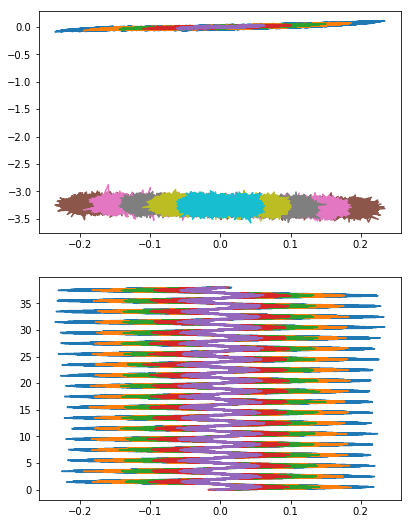

In [4]:
fig=plt.figure(figsize=(6.5,9))
ax1 = fig.add_subplot(211)
ax1.plot(t,V,t,J)
ax2=fig.add_subplot(212)
ax2.plot(t,Ir)

# ax3=fig.add_subplot(313)
# ax3.plot(freq,Vfft.real,freq,Vfft.imag)
# ax3.set_xlim(0,3)
plt.show()

In [ ]:
Vfft=np.fft.fft(V[:,0])/(Ns/2)
Jfft=np.fft.fft(J[:,0])/(Ns/2)
Ifft=np.fft.fft(Ir[:,0])/(Ns/2)
freq=np.fft.fftfreq(Ns,dt)

print(np.abs(Vfft[120]),np.angle(Vfft[120]),Vfft[120])

In [ ]:
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

In [ ]:
Vpol=[]
Vang=np.angle(Vfft)
Jang=np.angle(Jfft)
Iang=np.angle(Ifft)

Vmag=np.abs(Vfft)
Jmag=np.abs(Jfft)
Imag=np.abs(Ifft)

Vang2=Vang-Vang[120]
Jang2=Jang-Vang[120]
Iang2=Iang-Vang[120]

Vfft2=P2R(Vmag,Vang2)
Jfft2=P2R(Jmag,Jang2)
Ifft2=P2R(Imag,Iang2)
##Should write function to phase adjust. Include option for harmonics adjustment too(?)

In [ ]:
fig=plt.figure(figsize=(6.5,9))
ax1 = fig.add_subplot(311)
# ax1.plot(t[:,1],V[:,1],t[:,0],J[:,0])
ax1.plot(freq,Vfft.real,freq,Vfft2.real*.001)
ax1.set_xlim(0.1,3)
ax1.set_ylim(0,.0015)

if Xrayraw==True:   
    ax2=fig.add_subplot(312)
    ax2.plot(t,Io,t,If,t,Ir)
else:
    ax2=fig.add_subplot(312)
    ax2.plot(t,Ir)

ax3=fig.add_subplot(313)
ax3.plot(freq,np.abs(Vfft),freq,np.abs(Vfft2),freq,Vfft.real,freq,Vfft2.real)
ax3.set_xlim(0.1,3)
ax3.set_ylim(0,.008)
plt.show()